<a href="https://colab.research.google.com/github/xazhu9/AIPI-590/blob/main/Assignment%20%234.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AIPI 590 - XAI | Assignment #04

Xuanang Zhu

Description: Choose 3 methods to fit and provide visualization to understand the process.



In [1]:
pip install imodels

In [2]:
from sklearn.model_selection import train_test_split
from imodels import get_clean_dataset, GreedyRuleListClassifier, SkopeRulesClassifier, HSTreeClassifierCV, BayesianRuleListClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import export_text
import pandas as pd
from imodels.rule_set.boosted_rules import BoostedRulesClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_text, plot_tree
from imodels.rule_list.one_r import OneRClassifier


Greedy rulelist model

In [3]:
X, y, feature_names = get_clean_dataset('csi_pecarn_pred')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

greedy_rulelist_model = GreedyRuleListClassifier()
greedy_rulelist_model.fit(X_train, y_train)
preds_greedy = greedy_rulelist_model.predict(X_test) # discrete predictions: shape is (n_test, 1)
preds_proba_greedy = greedy_rulelist_model.predict_proba(X_test)
print(greedy_rulelist_model)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


> ------------------------------
> Greedy Rule List
> ------------------------------
↓
11.71% risk (2484 pts)
	if X14 ==> 42.699999999999996% risk (375 pts)
↓
11.15% risk (2109 pts)
	if X4 ==> 70.0% risk (20 pts)
↓
9.93% risk (2089 pts)
	if X18 ==> 30.4% risk (125 pts)
↓
7.18% risk (1964 pts)
	if X13 ==> 17.7% risk (515 pts)
↓
2.3% risk (1449 pts)
	if X15 ==> 14.499999999999998% risk (579 pts)
↓
2.3% risk (870 pts)



In [4]:
X, y, feature_names = get_clean_dataset('csi_pecarn_pred')
# print feature names
for i, feature in enumerate(feature_names):
    print(f'X{i} is: {feature}')


X0 is: SITE
X1 is: LOC
X2 is: ambulatory
X3 is: Predisposed
X4 is: HighriskDiving
X5 is: HighriskFall
X6 is: HighriskHanging
X7 is: HighriskHitByCar
X8 is: HighriskMVC
X9 is: HighriskOtherMV
X10 is: AxialLoadAnyDoc
X11 is: axialloadtop
X12 is: Clotheslining
X13 is: AlteredMentalStatus2
X14 is: FocalNeuroFindings2
X15 is: PainNeck2
X16 is: PosMidNeckTenderness2
X17 is: TenderNeck2
X18 is: Torticollis2
X19 is: SubInjHead2
X20 is: SubInjFace2
X21 is: SubInjExt2
X22 is: SubInjTorsoTrunk2
X23 is: IsEms
X24 is: Position_IDEMS
X25 is: Position_L
X26 is: Position_PA
X27 is: Position_S
X28 is: Position_W
X29 is: PtCompPainHead2
X30 is: PtCompPainFace2
X31 is: PtCompPainExt2
X32 is: PtCompPainTorsoTrunk2
X33 is: PtTenderHead2
X34 is: PtTenderFace2
X35 is: PtTenderExt2
X36 is: PtTenderTorsoTrunk2
X37 is: AgeInYears
X38 is: gender_F


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Boosted rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Rules for estimator 1:
|--- FocalNeuroFindings2 <= 0.50
|   |--- class: 0.0
|--- FocalNeuroFindings2 >  0.50
|   |--- class: 0.0

Rules for estimator 2:
|--- PainNeck2 <= 0.50
|   |--- class: 0.0
|--- PainNeck2 >  0.50
|   |--- class: 1.0

Rules for estimator 3:
|--- AlteredMentalStatus2 <= 0.50
|   |--- class: 0.0
|--- AlteredMentalStatus2 >  0.50
|   |--- class: 1.0

Rules for estimator 4:
|--- IsEms <= 0.50
|   |--- class: 1.0
|--- IsEms >  0.50
|   |--- class: 0.0

Rules for estimator 5:
|--- HighriskMVC <= 0.50
|   |--- class: 0.0
|--- HighriskMVC >  0.50
|   |--- class: 1.0

Rules for estimator 6:
|--- HighriskDiving <= 0.50
|   |--- class: 0.0
|--- HighriskDiving >  0.50
|   |--- class: 1.0

Rules for estimator 7:
|--- PtCompPainHead2 <= 0.50
|   |--- class: 1.0
|--- PtCompPainHead2 >  0.50
|   |--- class: 0.0

Rules for estimator 8:
|--- Position_S <= 0.50
|   |--- class: 1.0
|--- Position_S >  0.50
|   |--- class: 0.0

Rules for estimator 9:
|--- Torticollis2 <= 0.50
|   |--- 

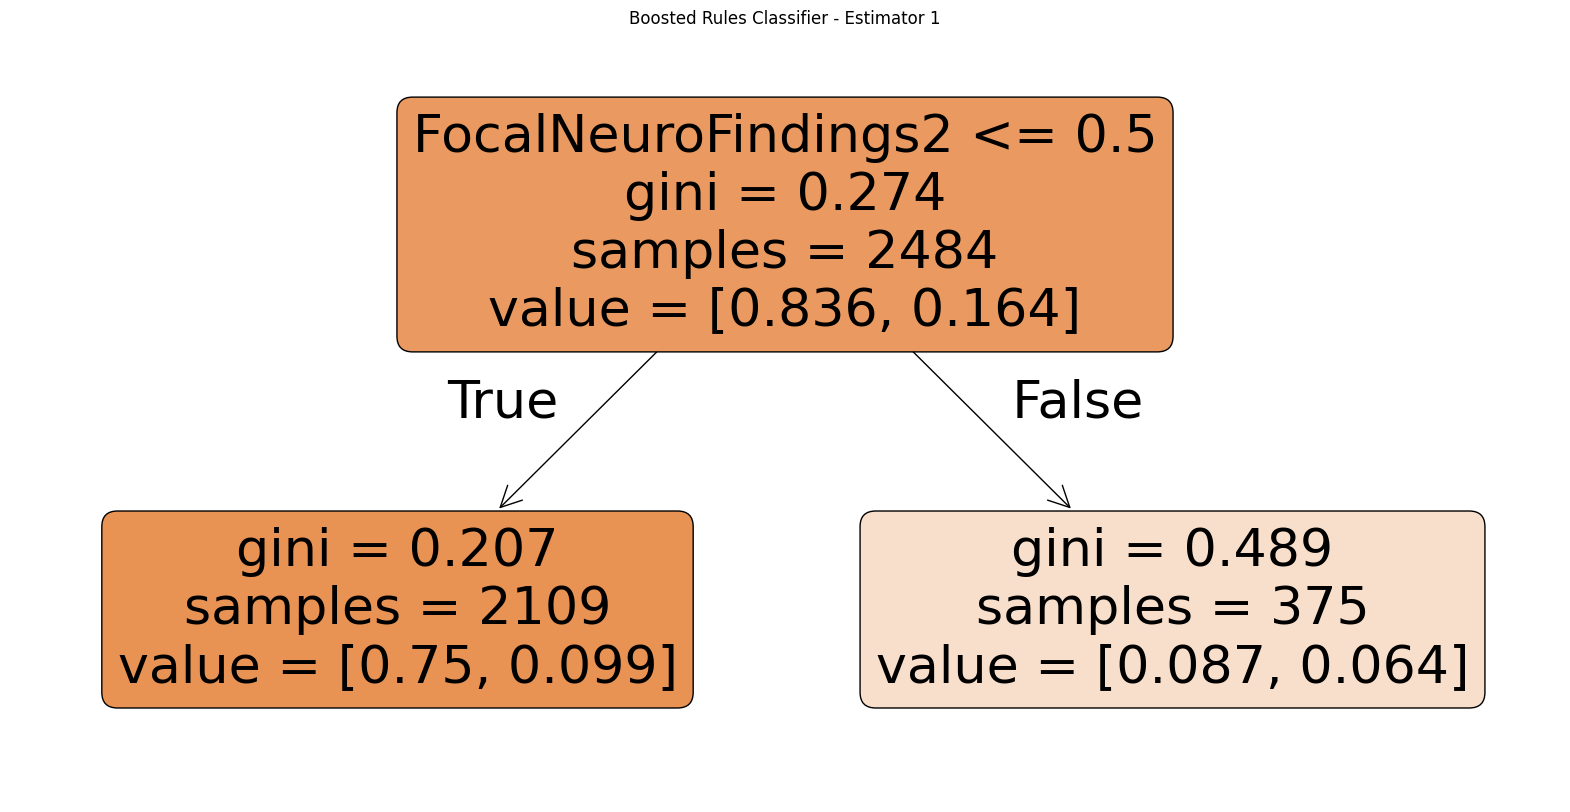

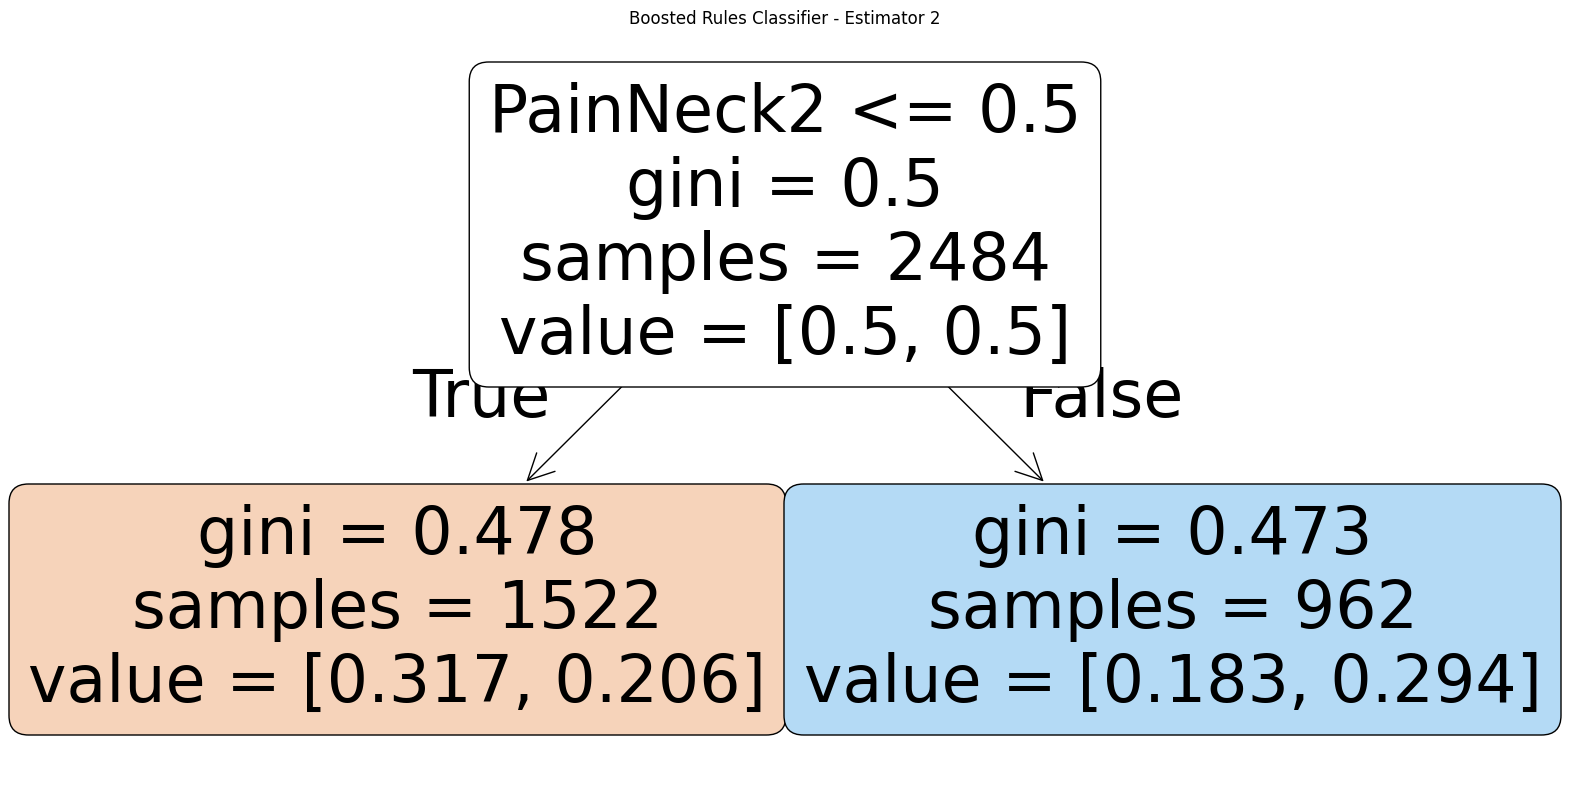

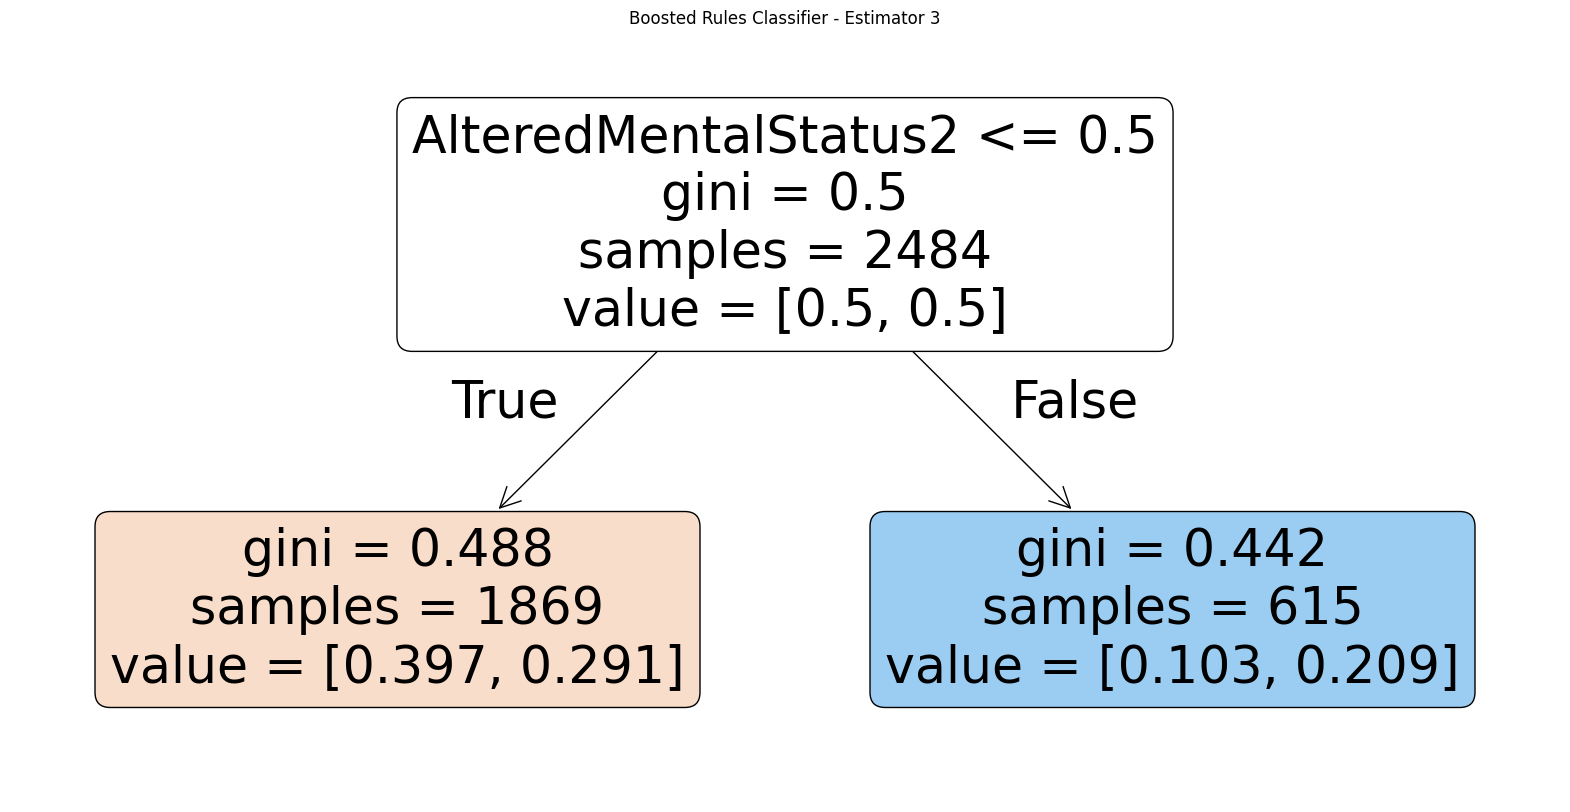

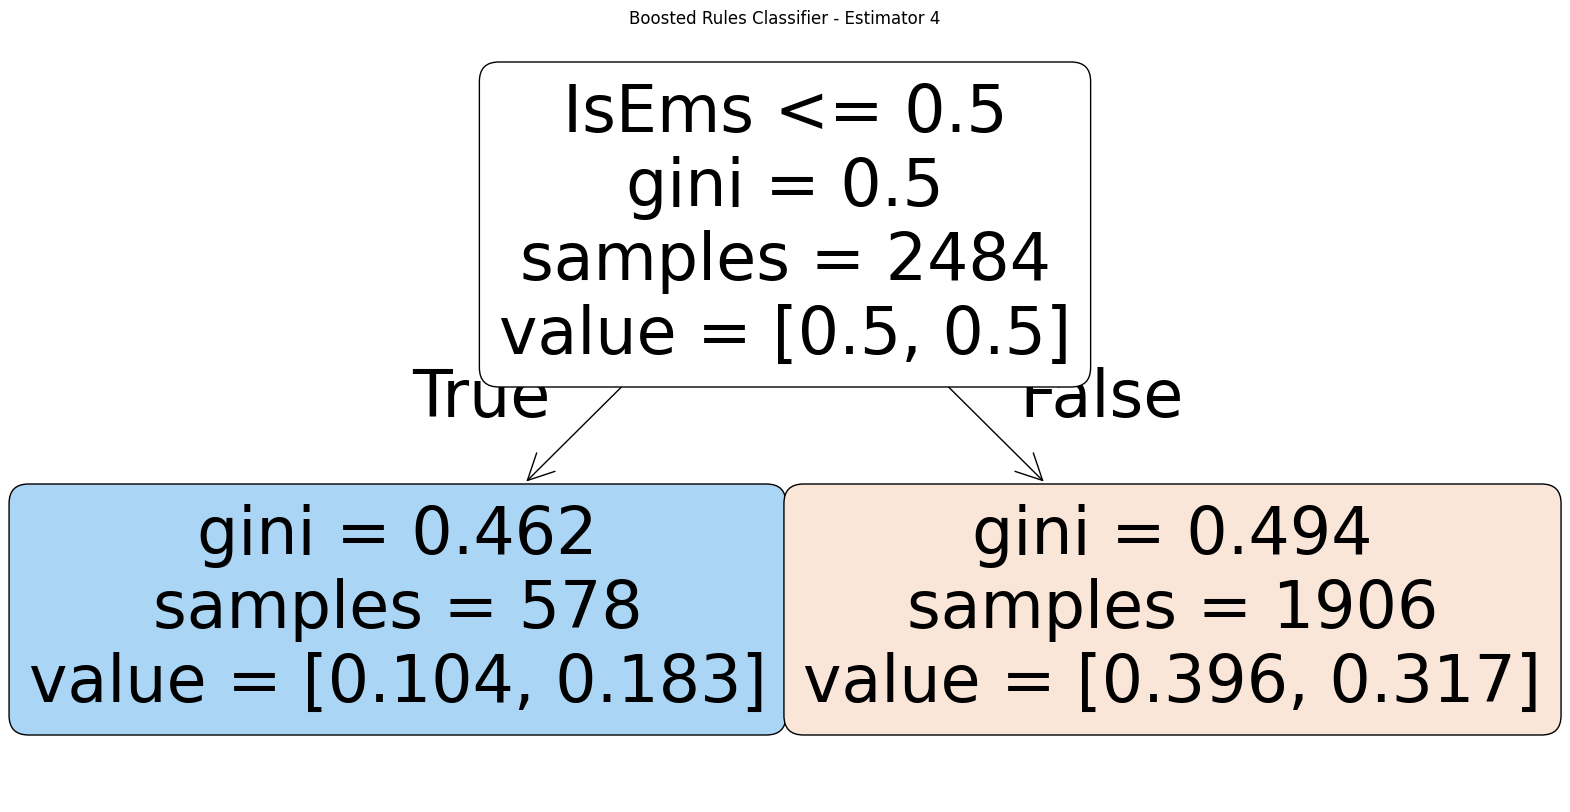

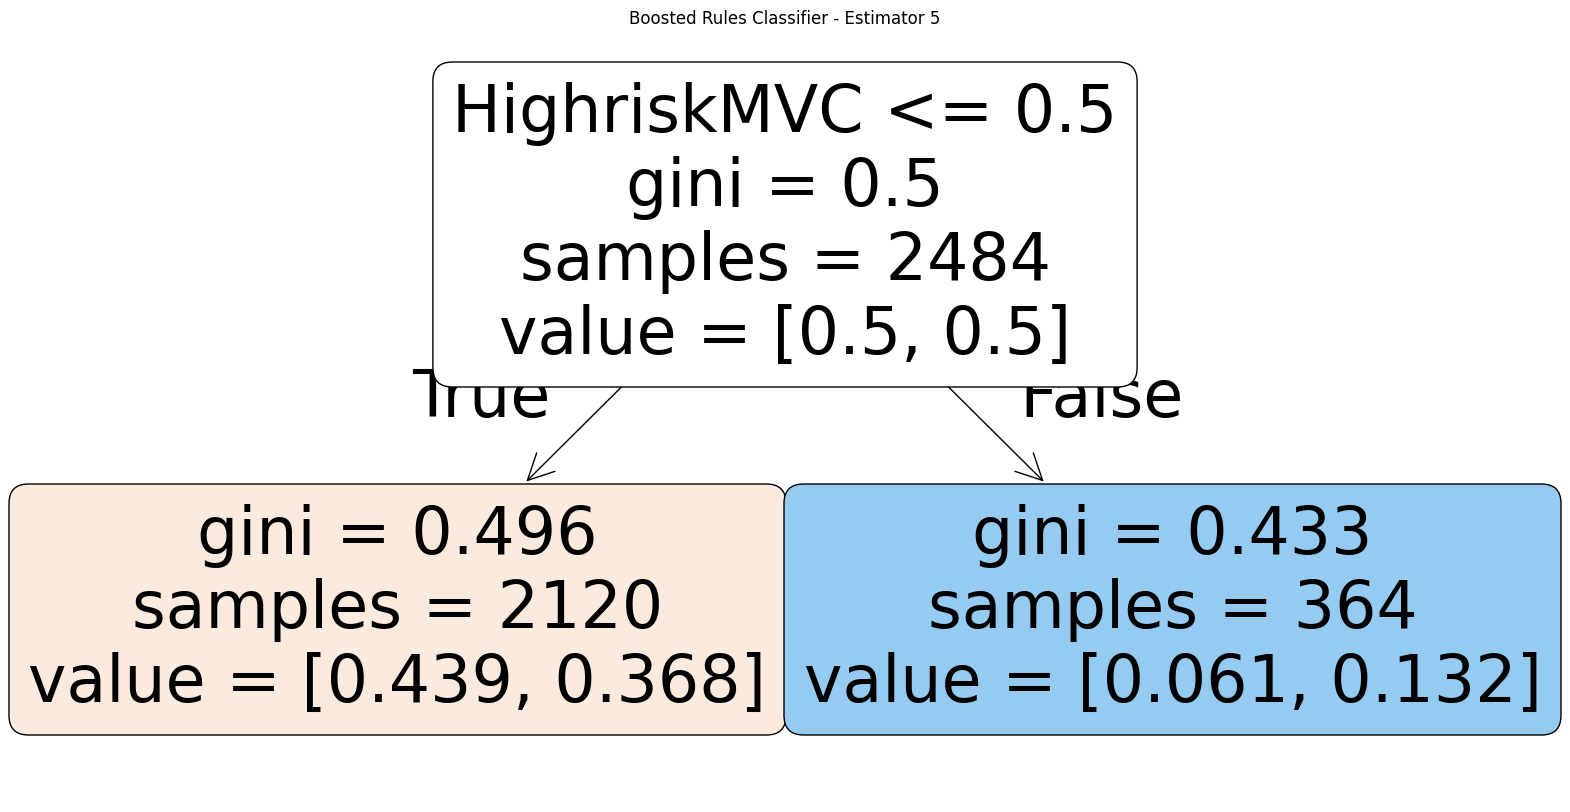

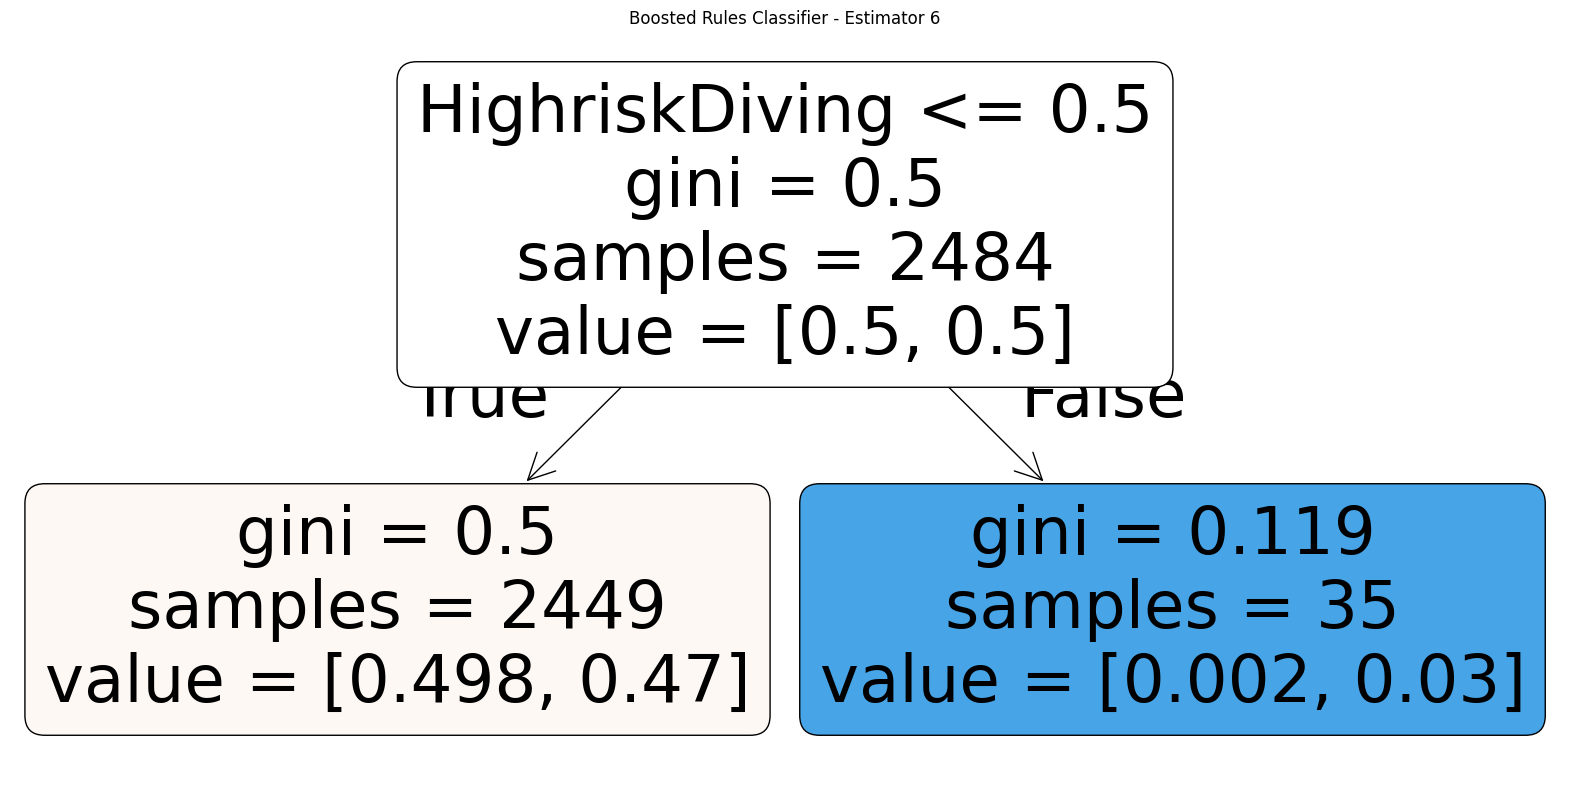

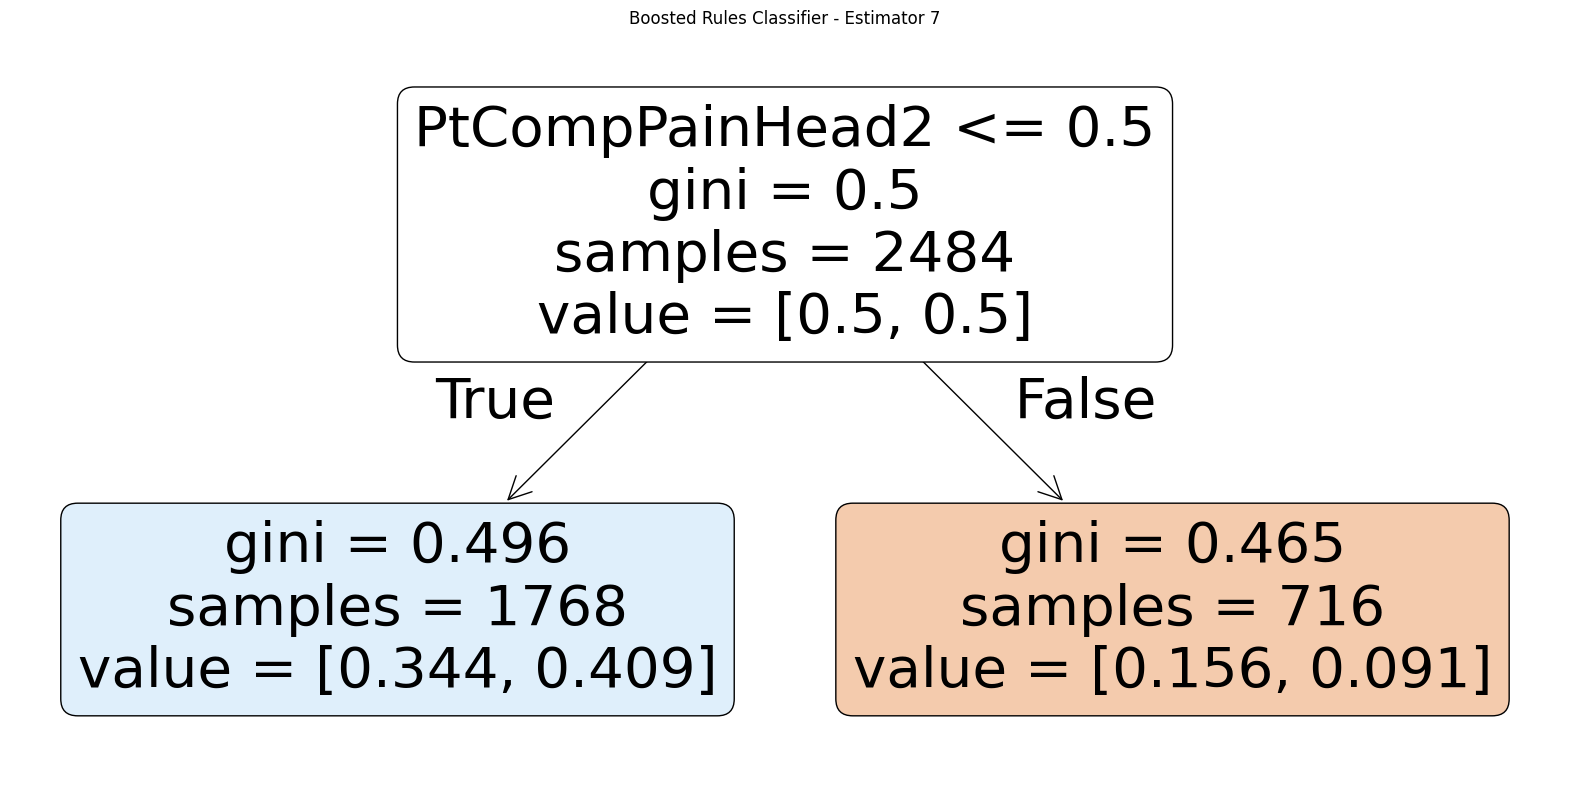

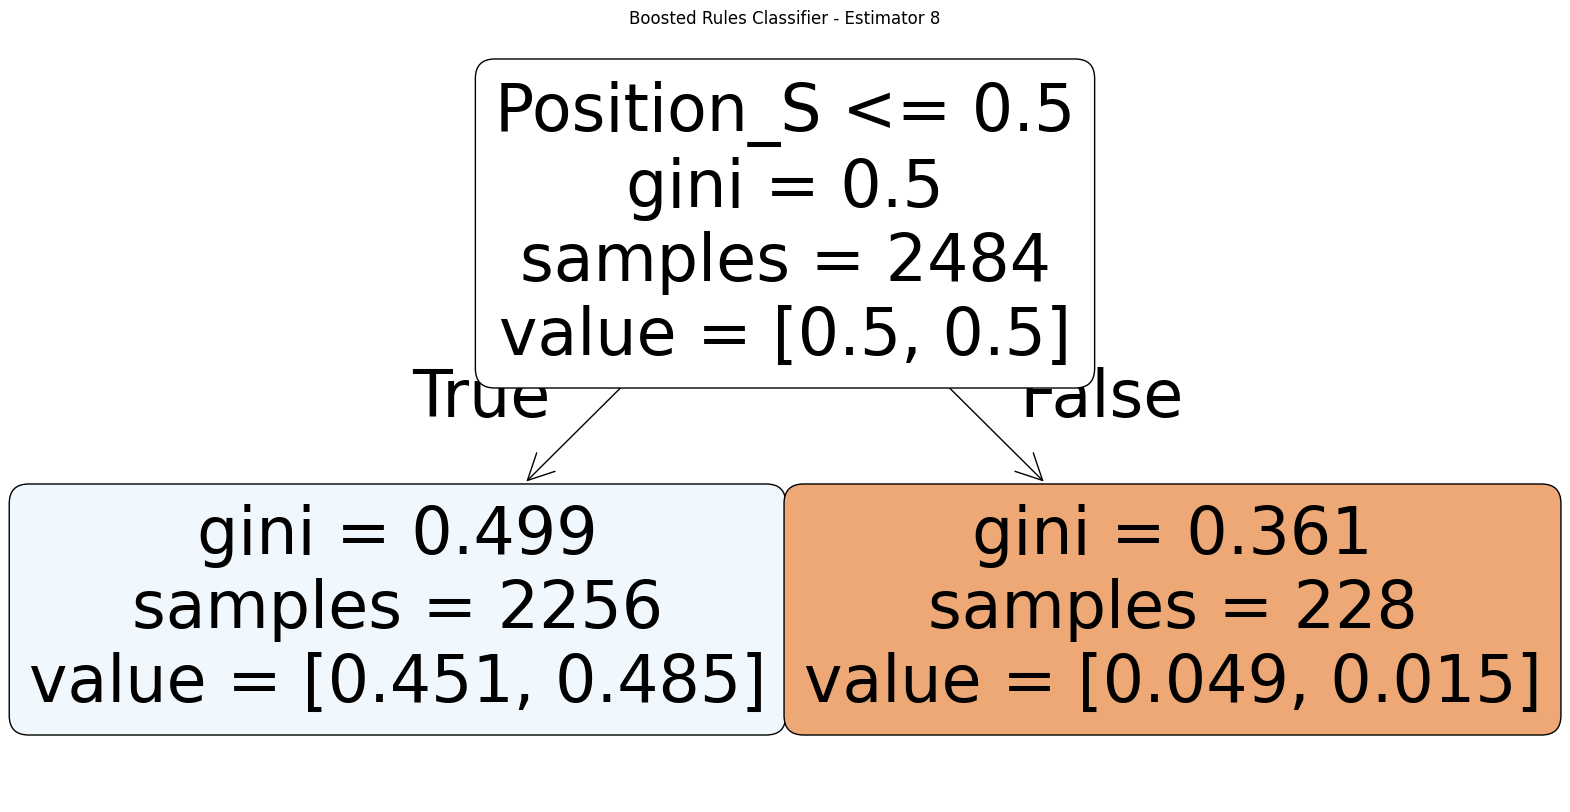

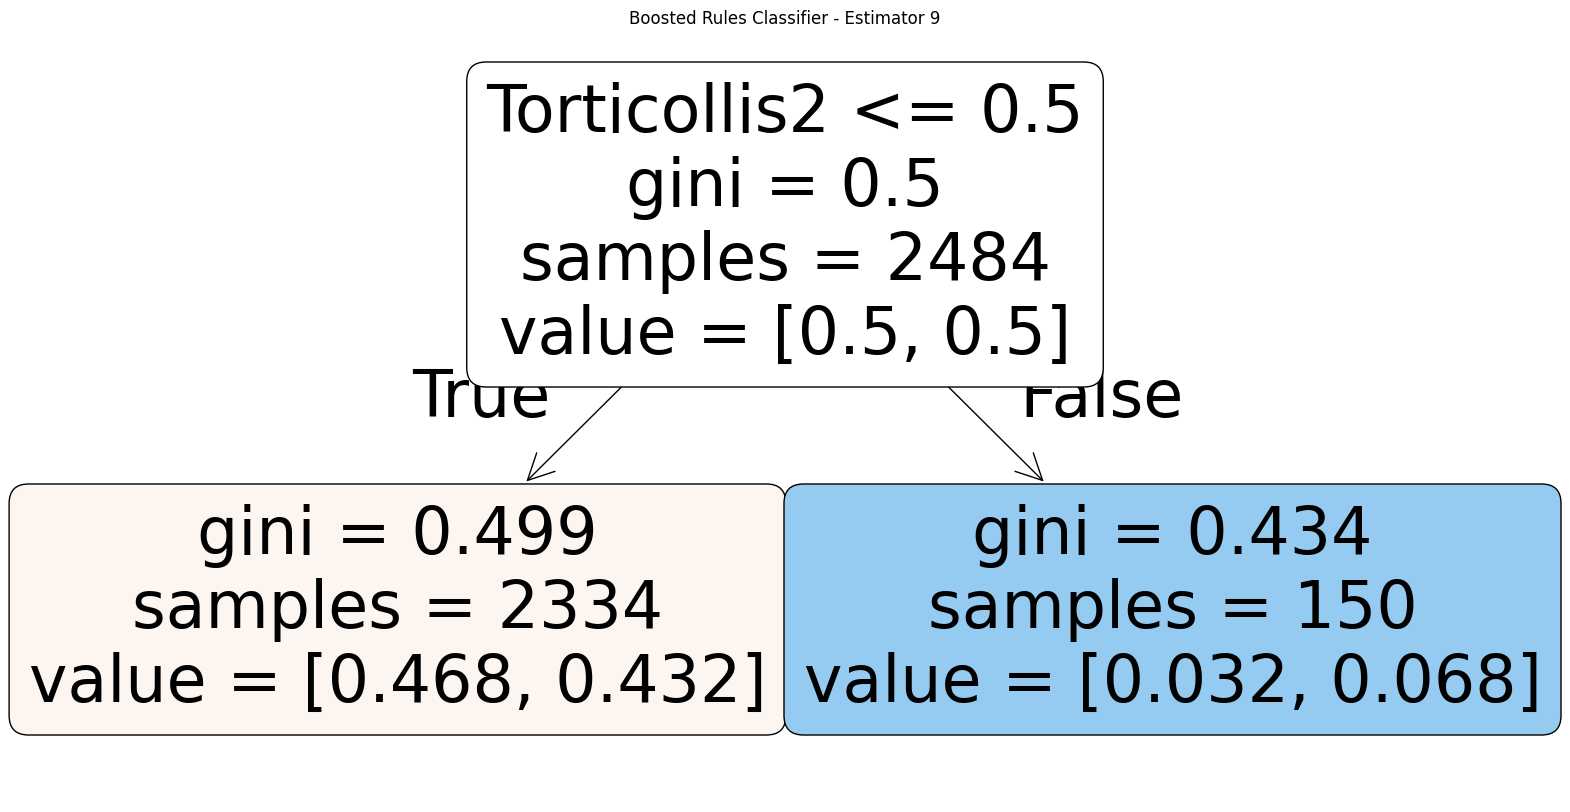

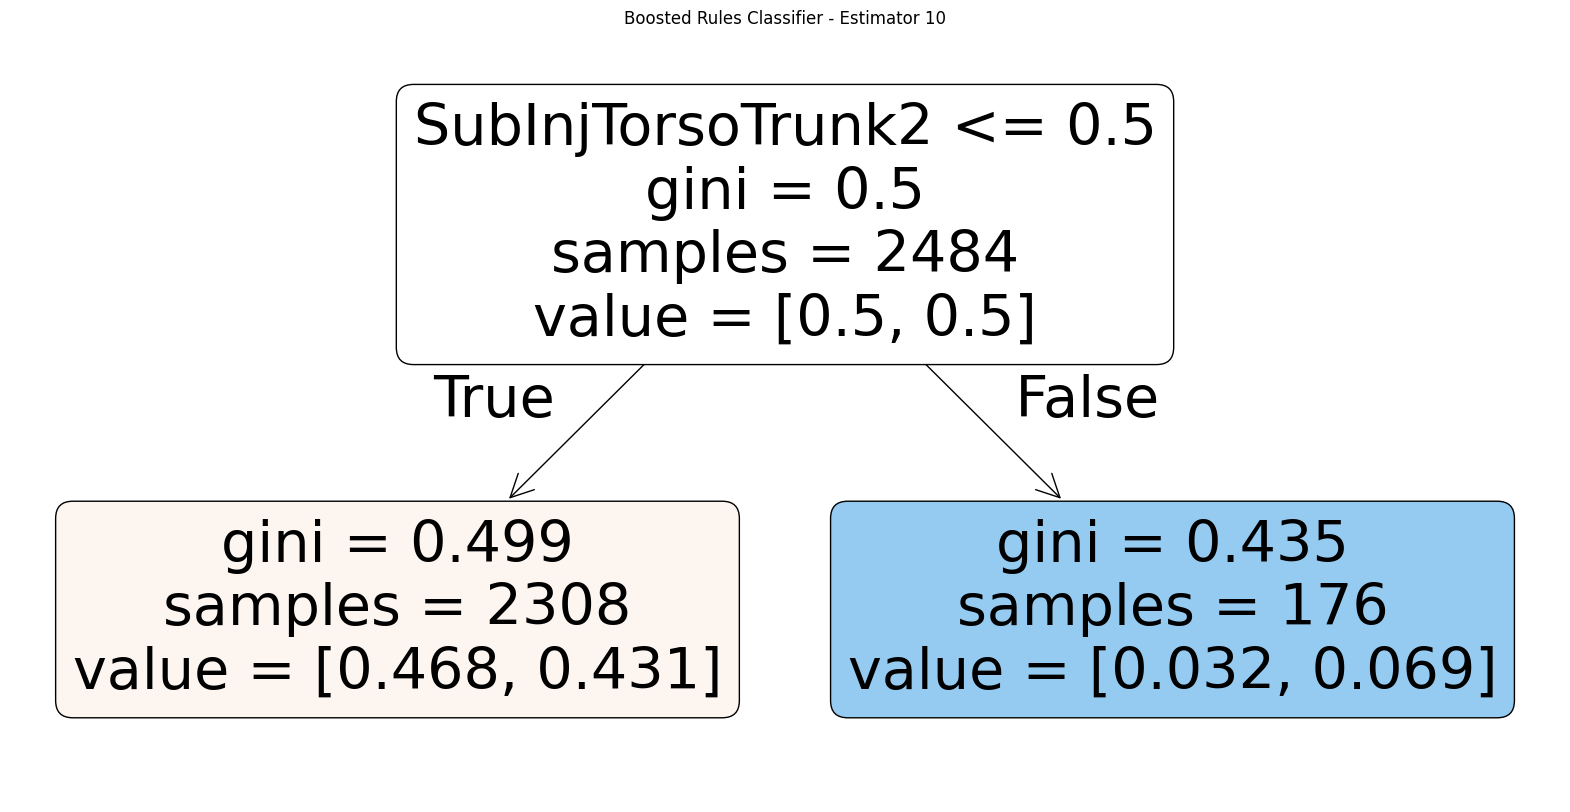


Classification Probabilities after each estimator:
After estimator 1, probabilities for the first 5 samples:
[[0.88288288 0.11711712]
 [0.57333333 0.42666667]
 [0.88288288 0.11711712]
 [0.88288288 0.11711712]
 [0.88288288 0.11711712]]
After estimator 2, probabilities for the first 5 samples:
[[0.68427891 0.31572109]
 [0.47782193 0.52217807]
 [0.77297739 0.22702261]
 [0.77297739 0.22702261]
 [0.77297739 0.22702261]]
After estimator 3, probabilities for the first 5 samples:
[[0.6500196  0.3499804 ]
 [0.51106671 0.48893329]
 [0.64122655 0.35877345]
 [0.71509396 0.28490604]
 [0.71509396 0.28490604]]
After estimator 4, probabilities for the first 5 samples:
[[0.58022244 0.41977756]
 [0.52216604 0.47783396]
 [0.62035035 0.37964965]
 [0.6782427  0.3217573 ]
 [0.6782427  0.3217573 ]]
After estimator 5, probabilities for the first 5 samples:
[[0.57297051 0.42702949]
 [0.52647765 0.47352235]
 [0.60536263 0.39463737]
 [0.65285173 0.34714827]
 [0.65285173 0.34714827]]
After estimator 6, probabili

In [5]:


# Get the dataset
X, y, feature_names = get_clean_dataset('csi_pecarn_pred')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Initialize and train the BoostedRulesClassifier model
boosted_rules_model = BoostedRulesClassifier(n_estimators=10)  # Set n_estimators to control the number of rules
boosted_rules_model.fit(X_train, y_train)

# Access the rules of each weak classifier (decision tree)
for i, estimator in enumerate(boosted_rules_model.estimators_):
    print(f"Rules for estimator {i + 1}:")
    tree_rules = export_text(estimator, feature_names=feature_names)
    print(tree_rules)

# Visualize each weak classifier (decision tree)
for i, estimator in enumerate(boosted_rules_model.estimators_):
    plt.figure(figsize=(20,10))
    plot_tree(estimator, feature_names=feature_names, filled=True, rounded=True)
    plt.title(f"Boosted Rules Classifier - Estimator {i+1}")
    plt.show()

# 2. Gradually check the prediction probabilities after each classifier (to show the classification improvement)
print("\nClassification Probabilities after each estimator:")
for i, y_proba in enumerate(boosted_rules_model.staged_predict_proba(X_test)):
    print(f"After estimator {i + 1}, probabilities for the first 5 samples:")
    print(y_proba[:5])

# 3. Final classification results
preds = boosted_rules_model.predict(X_test)
print("\nFinal predictions:")
print(preds[:5])  # Print classification results for the first 5 samples

# 4. Calculate model accuracy
accuracy = accuracy_score(y_test, preds)
print(f"\nModel Accuracy: {accuracy:.2f}")


In [6]:
# Get the dataset
X, y, feature_names = get_clean_dataset('csi_pecarn_pred')

# Convert to DataFrame for easier manipulation
X_df = pd.DataFrame(X, columns=feature_names)

# Drop the 'SITE' column (or X0) to prevent the model from using it
X_df = X_df.drop(columns=['SITE'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_df, y, random_state=42)

# Initialize and train the OneRClassifier model without 'SITE'
one_r_model = OneRClassifier()
one_r_model.fit(X_train, y_train)

# 1. Access and display the rules used by the OneRClassifier
print("\nOneR Classifier Model Rules (without SITE):")
print(one_r_model)

# 2. Predict on the test set
preds_one_r = one_r_model.predict(X_test)
print("\nFinal predictions (first 5 samples):")
print(preds_one_r[:5])  # Print classification results for the first 5 samples

# 3. Calculate and print model accuracy
accuracy_one_r = accuracy_score(y_test, preds_one_r)
print(f"\nOneR Model Accuracy (without SITE): {accuracy_one_r:.2f}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



OneR Classifier Model Rules (without SITE):
> ------------------------------
> Greedy Rule List
> ------------------------------
↓
15.67% risk (2484 pts)
	if LOC ==> 17.299999999999997% risk (1061 pts)


Final predictions (first 5 samples):
[0 0 0 0 0]

OneR Model Accuracy (without SITE): 0.84
